In [24]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import funcs
import imp
import random
import mne
from scipy.signal import hilbert
imp.reload(funcs)

<module 'funcs' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\intelligence_tRNS\\tRNS-Intelligence\\processing\\funcs.py'>

In [25]:
load_path = os.path.join('..', '..', '..', 'data', 'subjects_behavior_eeg.pkl')
subjects_behavior_eeg = pd.read_pickle(load_path)
# 26.5s

In [26]:
exp_info = funcs.load_info()
rpm_answers = funcs.load_rpm_answers()
subjects_behavior = funcs.load_subjects_behavior()

rpm_difficulty = pd.DataFrame(columns=['question', 'average time', 'difficulty'])
rpm_difficulty['question'] = rpm_answers['question'][0:82]
df = subjects_behavior[(subjects_behavior['reaction time'] != 0) & (subjects_behavior['task time'] == 'pre')]
for i in range(82):
    question_index = rpm_difficulty['question'][i]
    rts = df[df['question'] == question_index]['reaction time']
    rpm_difficulty['average time'][i] = rts.mean()
    
conditions = [
    (rpm_difficulty['average time'] < 10),
    (rpm_difficulty['average time'] >= 10) & (rpm_difficulty['average time'] <= 20),
    (rpm_difficulty['average time'] > 20)
]
choices = [1, 2, 3]
rpm_difficulty['difficulty'] = np.select(conditions, choices)

c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\intelligence_tRNS\tRNS-Intelligence\processing\funcs.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  subjects_behavior = pd.concat([subjects_behavior, one_behavior], ignore_index=True)


### EASY

In [34]:
def make_R_table(series):
    R_table = []
    for raw in series:
        band = [55, 95] # high gamma band: 55-95 Hz
        eeg = raw.filter(band[0], band[1]).get_data()[1:32,:]
        R = funcs.synchrony_R(eeg)
        R_table.append(R)

    return R_table

difficulty = 1
subset_questions = rpm_difficulty[rpm_difficulty['difficulty'] == difficulty]

matching_rows = subjects_behavior_eeg[subjects_behavior_eeg['question'].isin(subset_questions['question'])]
subset_alpha = matching_rows[matching_rows['correct'] == 1]

pre_sham_series = subset_alpha[(subset_alpha['condition'] == 'Sham') & (subset_alpha['task time'] == 'pre')]['raw']
post_sham_series = subset_alpha[(subset_alpha['condition'] == 'Sham') & (subset_alpha['task time'] == 'post')]['raw']
pre_active_series = subset_alpha[(subset_alpha['condition'] == 'Active') & (subset_alpha['task time'] == 'pre')]['raw']
post_active_series = subset_alpha[(subset_alpha['condition'] == 'Active') & (subset_alpha['task time'] == 'post')]['raw']

presham = make_R_table(pre_sham_series)
postsham = make_R_table(post_sham_series)
preactive = make_R_table(pre_active_series)
postactive = make_R_table(post_active_series)

# 1min 47.9s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


removed 37 outliers out of 174

removed 18 outliers out of 176

removed 0 outliers out of 174

removed 8 outliers out of 176


Pre-sham vs. Post-sham: p = 0.35167143737168194

Pre-active vs. Post-active: p = 0.003964053739163424

Pre-sham vs. Pre-active: p = 0.4339437529748419

Post-sham vs. Post-active: p = 0.0026452990420486704


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


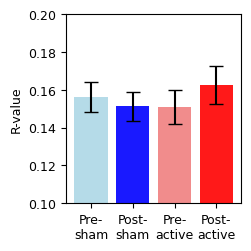

In [50]:
pre_sham = funcs.remove_outliers(np.array(presham), low_k=5, high_k=0.1, verbose=True)
post_sham = funcs.remove_outliers(np.array(postsham), low_k=5, high_k=0.5, verbose=True)
pre_active = funcs.remove_outliers(np.array(preactive), low_k=5, high_k=5, verbose=True)
post_active = funcs.remove_outliers(np.array(postactive), low_k=0.5, high_k=10, verbose=True)

means = [np.mean(pre_sham), np.mean(post_sham), np.mean(pre_active), np.mean(post_active)]

multiplier = 1.96*2   # 95% confidence interval
std_errors = [
    multiplier*np.std(pre_sham) / np.sqrt(len(pre_sham)), multiplier*np.std(post_sham) / np.sqrt(len(post_sham)),
    multiplier*np.std(pre_active) / np.sqrt(len(pre_active)), multiplier*np.std(post_active) / np.sqrt(len(post_active))
]

# Calculate t-tests
_, p_sham = stats.ttest_ind(pre_sham, post_sham)
_, p_real = stats.ttest_ind(pre_active, post_active)
_, p_pre = stats.ttest_ind(pre_sham, pre_active)
_, p_post = stats.ttest_ind(post_sham, post_active)

print(f"\nPre-sham vs. Post-sham: p = {p_sham*4}")
print(f"\nPre-active vs. Post-active: p = {p_real*4}")
print(f"\nPre-sham vs. Pre-active: p = {p_pre*4}")
print(f"\nPost-sham vs. Post-active: p = {p_post*4}")

# Bar chart
labels = ['Pre-\nsham', 'Post-\nsham', 'Pre-\nactive', 'Post-\nactive']
colors = ['lightblue', 'blue', 'lightcoral', 'red']

# Plotting
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(6*cm, 6*cm))

# Plotting error bars
for i in range(4):
    ax.bar(labels[i], means[i], yerr=std_errors[i], color=colors[i], capsize=5, alpha=0.9)

# Add some additional formatting if desired
ax.set_ylabel('R-value')
# ax.set_title(case)
ax.set_ylim([0.1, 0.2])  # Adjust as needed
# ax.set_yticks([0.5, 1.0, 1.5])
matplotlib.rcParams.update({'font.size': 9})

# Adjust layout and margins
plt.tight_layout(pad=1.0)
# plt.title('Frontal cluster', pad=6)
fig.subplots_adjust(left=0.24, bottom=0.15, right=0.98, top=0.95)
save_path = os.path.join('..', '..', '..', 'paper', 'excind', 'R_easy.eps')
plt.savefig(save_path, format='eps')
save_path = os.path.join('..', '..', '..', 'paper', 'excind', 'R_easy.png')
plt.savefig(save_path, format='png', dpi=600)
plt.show()

### MEDIUM

In [52]:
def make_R_table(series):
    R_table = []
    for raw in series:
        band = [55, 95] # high gamma band: 55-95 Hz
        eeg = raw.filter(band[0], band[1]).get_data()[1:32,:]
        R = funcs.synchrony_R(eeg)
        R_table.append(R)

    return R_table

difficulty = 2
subset_questions = rpm_difficulty[rpm_difficulty['difficulty'] == difficulty]

matching_rows = subjects_behavior_eeg[subjects_behavior_eeg['question'].isin(subset_questions['question'])]
subset_alpha = matching_rows[matching_rows['correct'] == 1]

pre_sham_series = subset_alpha[(subset_alpha['condition'] == 'Sham') & (subset_alpha['task time'] == 'pre')]['raw']
post_sham_series = subset_alpha[(subset_alpha['condition'] == 'Sham') & (subset_alpha['task time'] == 'post')]['raw']
pre_active_series = subset_alpha[(subset_alpha['condition'] == 'Active') & (subset_alpha['task time'] == 'pre')]['raw']
post_active_series = subset_alpha[(subset_alpha['condition'] == 'Active') & (subset_alpha['task time'] == 'post')]['raw']

presham = make_R_table(pre_sham_series)
postsham = make_R_table(post_sham_series)
preactive = make_R_table(pre_active_series)
postactive = make_R_table(post_active_series)

# 3min 41.2s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.8

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


removed 28 outliers out of 173

removed 0 outliers out of 173

removed 0 outliers out of 171

removed 0 outliers out of 172


Pre-sham vs. Post-sham: p = 3.082238154999713

Pre-active vs. Post-active: p = 0.7163364499521736

Pre-sham vs. Pre-active: p = 0.5343221162734093

Post-sham vs. Post-active: p = 2.9726843975528405


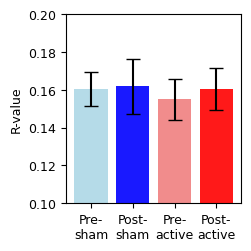

In [55]:
pre_sham = funcs.remove_outliers(np.array(presham), low_k=5, high_k=0.5, verbose=True)
post_sham = funcs.remove_outliers(np.array(postsham), low_k=5, high_k=5, verbose=True)
pre_active = funcs.remove_outliers(np.array(preactive), low_k=5, high_k=5, verbose=True)
post_active = funcs.remove_outliers(np.array(postactive), low_k=5, high_k=5, verbose=True)

means = [np.mean(pre_sham), np.mean(post_sham), np.mean(pre_active), np.mean(post_active)]

multiplier = 1.96*2   # 95% confidence interval
std_errors = [
    multiplier*np.std(pre_sham) / np.sqrt(len(pre_sham)), multiplier*np.std(post_sham) / np.sqrt(len(post_sham)),
    multiplier*np.std(pre_active) / np.sqrt(len(pre_active)), multiplier*np.std(post_active) / np.sqrt(len(post_active))
]

# Calculate t-tests
_, p_sham = stats.ttest_ind(pre_sham, post_sham)
_, p_real = stats.ttest_ind(pre_active, post_active)
_, p_pre = stats.ttest_ind(pre_sham, pre_active)
_, p_post = stats.ttest_ind(post_sham, post_active)

print(f"\nPre-sham vs. Post-sham: p = {p_sham*4}")
print(f"\nPre-active vs. Post-active: p = {p_real*4}")
print(f"\nPre-sham vs. Pre-active: p = {p_pre*4}")
print(f"\nPost-sham vs. Post-active: p = {p_post*4}")

# Bar chart
labels = ['Pre-\nsham', 'Post-\nsham', 'Pre-\nactive', 'Post-\nactive']
colors = ['lightblue', 'blue', 'lightcoral', 'red']

# Plotting
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(6*cm, 6*cm))

# Plotting error bars
for i in range(4):
    ax.bar(labels[i], means[i], yerr=std_errors[i], color=colors[i], capsize=5, alpha=0.9)

# Add some additional formatting if desired
ax.set_ylabel('R-value')
# ax.set_title(case)
ax.set_ylim([0.1, 0.2])  # Adjust as needed
# ax.set_yticks([0.5, 1.0, 1.5])
matplotlib.rcParams.update({'font.size': 9})

# Adjust layout and margins
plt.tight_layout(pad=1.0)
# plt.title('Frontal cluster', pad=6)
fig.subplots_adjust(left=0.24, bottom=0.15, right=0.98, top=0.95)
save_path = os.path.join('..', '..', '..', 'paper', 'excind', 'R_medium.eps')
plt.savefig(save_path, format='eps')
save_path = os.path.join('..', '..', '..', 'paper', 'excind', 'R_medium.png')
plt.savefig(save_path, format='png', dpi=600)
plt.show()

### HARD

In [56]:
def make_R_table(series):
    R_table = []
    for raw in series:
        band = [55, 95] # high gamma band: 55-95 Hz
        eeg = raw.filter(band[0], band[1]).get_data()[1:32,:]
        R = funcs.synchrony_R(eeg)
        R_table.append(R)

    return R_table

difficulty = 3
subset_questions = rpm_difficulty[rpm_difficulty['difficulty'] == difficulty]

matching_rows = subjects_behavior_eeg[subjects_behavior_eeg['question'].isin(subset_questions['question'])]
subset_alpha = matching_rows[matching_rows['correct'] == 1]

pre_sham_series = subset_alpha[(subset_alpha['condition'] == 'Sham') & (subset_alpha['task time'] == 'pre')]['raw']
post_sham_series = subset_alpha[(subset_alpha['condition'] == 'Sham') & (subset_alpha['task time'] == 'post')]['raw']
pre_active_series = subset_alpha[(subset_alpha['condition'] == 'Active') & (subset_alpha['task time'] == 'pre')]['raw']
post_active_series = subset_alpha[(subset_alpha['condition'] == 'Active') & (subset_alpha['task time'] == 'post')]['raw']

presham = make_R_table(pre_sham_series)
postsham = make_R_table(post_sham_series)
preactive = make_R_table(pre_active_series)
postactive = make_R_table(post_active_series)

# 8 min 20.4 s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 55 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 55.00
- Lower transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 48.12 Hz)
- Upper passband edge: 95.00 Hz
- Upper transition bandwidth: 23.75 Hz (-6 dB cutoff frequency: 106.88 Hz)
- Filter length: 1153 samples (0.240 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


removed 32 outliers out of 143

removed 0 outliers out of 148

removed 8 outliers out of 141

removed 4 outliers out of 148


Pre-sham vs. Post-sham: p = 1.4533513690390918

Pre-active vs. Post-active: p = 0.023891031176116677

Pre-sham vs. Pre-active: p = 2.399417608542528

Post-sham vs. Post-active: p = 0.8284152126936872


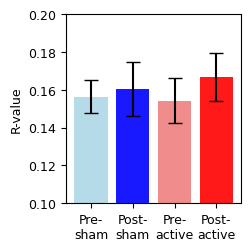

In [66]:
pre_sham = funcs.remove_outliers(np.array(presham), low_k=5, high_k=0.1, verbose=True)
post_sham = funcs.remove_outliers(np.array(postsham), low_k=5, high_k=5, verbose=True)
pre_active = funcs.remove_outliers(np.array(preactive), low_k=5, high_k=0.5, verbose=True)
post_active = funcs.remove_outliers(np.array(postactive), low_k=0.5, high_k=5, verbose=True)

means = [np.mean(pre_sham), np.mean(post_sham), np.mean(pre_active), np.mean(post_active)]

multiplier = 1.96*2   # 95% confidence interval
std_errors = [
    multiplier*np.std(pre_sham) / np.sqrt(len(pre_sham)), multiplier*np.std(post_sham) / np.sqrt(len(post_sham)),
    multiplier*np.std(pre_active) / np.sqrt(len(pre_active)), multiplier*np.std(post_active) / np.sqrt(len(post_active))
]

# Calculate t-tests
_, p_sham = stats.ttest_ind(pre_sham, post_sham)
_, p_real = stats.ttest_ind(pre_active, post_active)
_, p_pre = stats.ttest_ind(pre_sham, pre_active)
_, p_post = stats.ttest_ind(post_sham, post_active)

print(f"\nPre-sham vs. Post-sham: p = {p_sham*4}")
print(f"\nPre-active vs. Post-active: p = {p_real*4}")
print(f"\nPre-sham vs. Pre-active: p = {p_pre*4}")
print(f"\nPost-sham vs. Post-active: p = {p_post*4}")

# Bar chart
labels = ['Pre-\nsham', 'Post-\nsham', 'Pre-\nactive', 'Post-\nactive']
colors = ['lightblue', 'blue', 'lightcoral', 'red']

# Plotting
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(6*cm, 6*cm))

# Plotting error bars
for i in range(4):
    ax.bar(labels[i], means[i], yerr=std_errors[i], color=colors[i], capsize=5, alpha=0.9)

# Add some additional formatting if desired
ax.set_ylabel('R-value')
# ax.set_title(case)
ax.set_ylim([0.1, 0.2])  # Adjust as needed
# ax.set_yticks([0.5, 1.0, 1.5])
matplotlib.rcParams.update({'font.size': 9})

# Adjust layout and margins
plt.tight_layout(pad=1.0)
# plt.title('Frontal cluster', pad=6)
fig.subplots_adjust(left=0.24, bottom=0.15, right=0.98, top=0.95)
save_path = os.path.join('..', '..', '..', 'paper', 'excind', 'R_hard.eps')
plt.savefig(save_path, format='eps')
save_path = os.path.join('..', '..', '..', 'paper', 'excind', 'R_hard.png')
plt.savefig(save_path, format='png', dpi=600)
plt.show()